1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

Q1 Load the dataset


In [4]:
park_df = pd.read_csv('parkinsons.data')
park_df.head().transpose()

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


Q2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [5]:
park_df.shape

(195, 24)

In [6]:
park_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [8]:
park_df.isnull()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
park_df.isnull().sum().sort_values(ascending=False).sum()

0

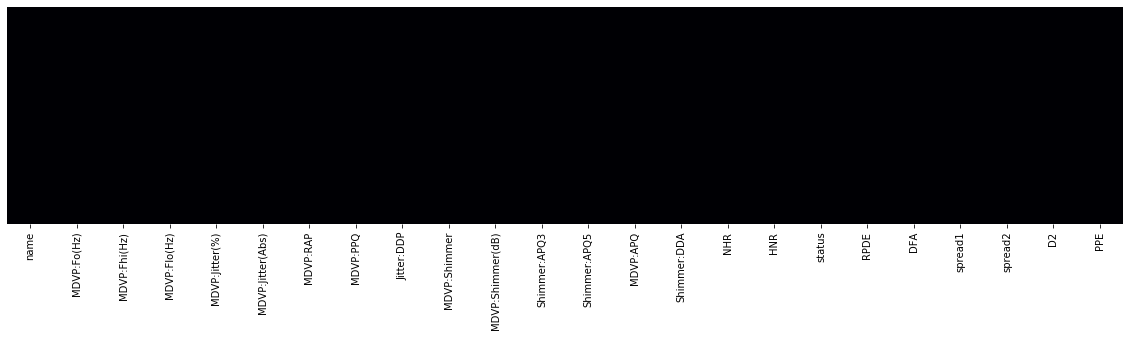

In [10]:
plt.figure(figsize=(20,4))
sns.heatmap(park_df.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 

In [11]:
#DataFlair - Get the features and labels
features=park_df.loc[:,park_df.columns!='status'].values[:,1:]
labels=park_df.loc[:,'status'].values
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


We have 147 ones and 48 zeros in the status column in our dataset.

Q3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [12]:
corr = park_df.corr()

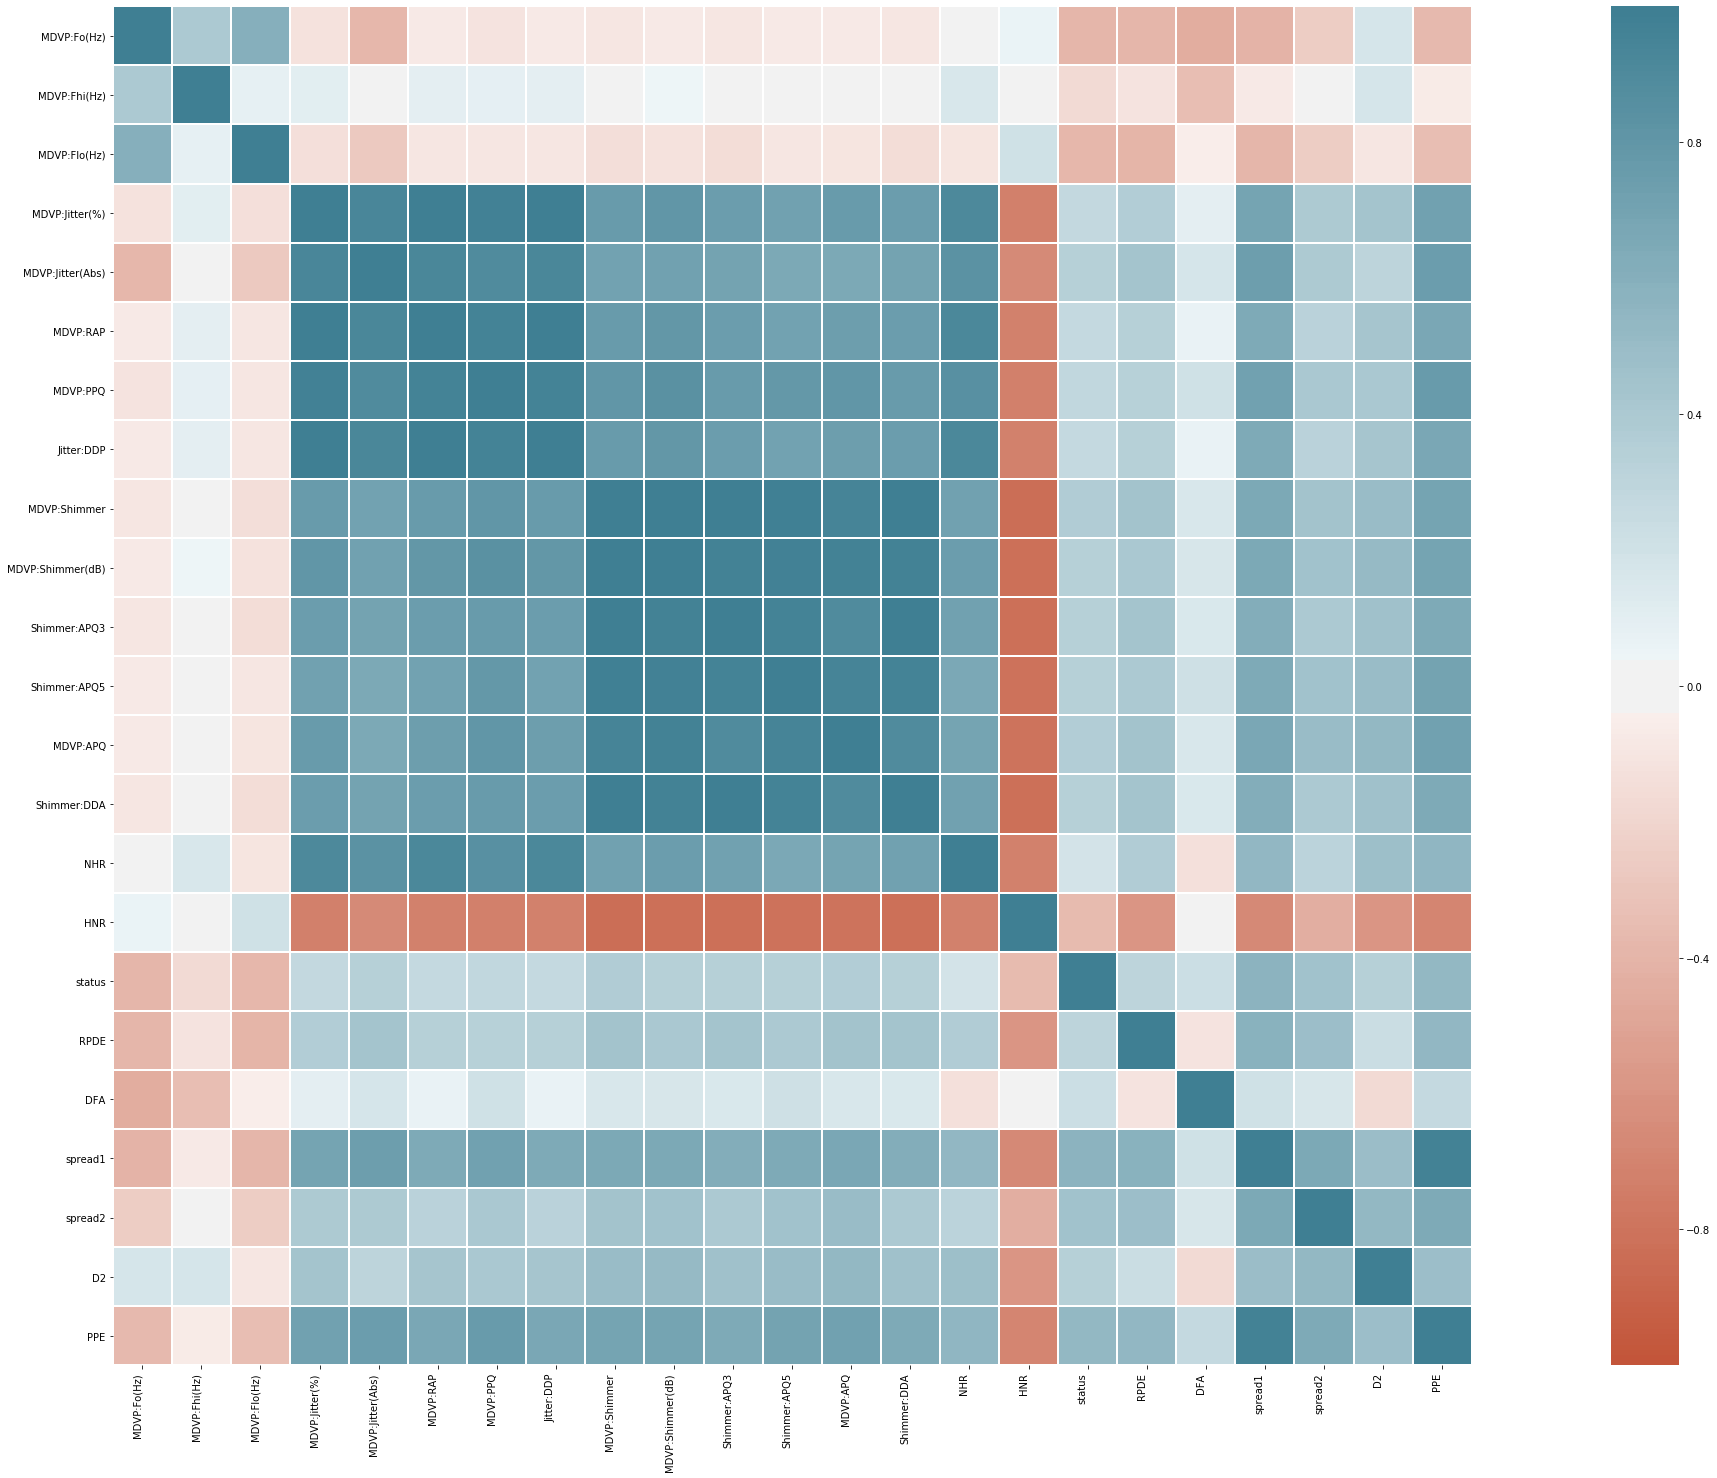

In [13]:
plt.figure(figsize = (50,25))


ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=300),
    square=True,
    linewidths=1
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=450,
    horizontalalignment='right'
);

Text(0.5, 1, 'Correlation of Features')

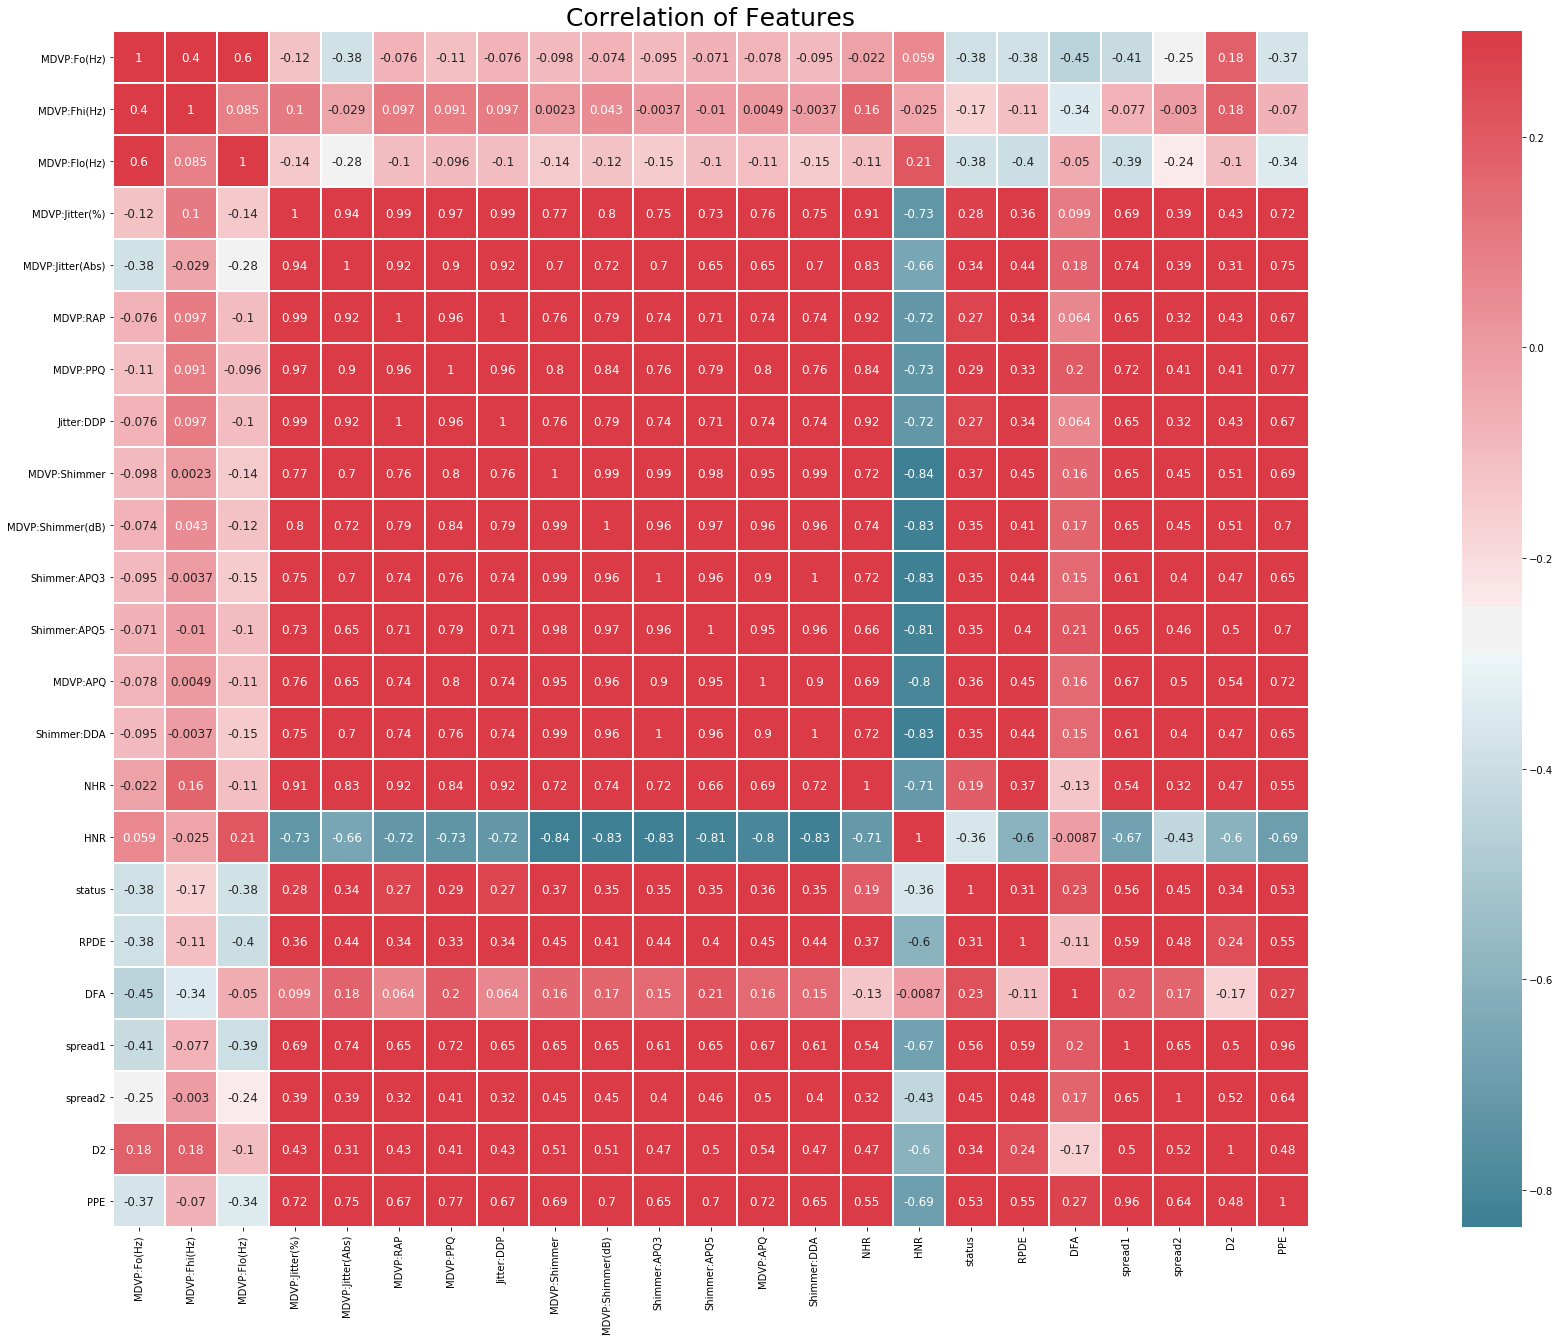

In [14]:
    fig , ax = plt.subplots(figsize =(55,22))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(corr,cmap = colormap,square=True,cbar_kws={'shrink':1 }, ax=ax,annot=True,linewidths=1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Correlation of Features', y=1, size=25)

In [15]:
## Dropping columns where pearson correlation >= 0.8
park_df.drop(columns=[ 'Jitter:DDP','NHR','spread1','MDVP:Jitter(Abs)','MDVP:PPQ' ,'MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:DDA','MDVP:Jitter(%)','Shimmer:APQ5','MDVP:APQ','HNR','MDVP:Fhi(Hz)','MDVP:RAP','MDVP:Shimmer'],axis=1,inplace=True)

park_df.head()

,name,MDVP:Fo(Hz),MDVP:Flo(Hz),status,RPDE,DFA,spread2,D2,PPE
0,phon_R01_S01_1,119.992,74.997,1,0.414783,0.815285,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,113.819,1,0.458359,0.819521,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,111.555,1,0.429895,0.825288,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,111.366,1,0.434969,0.819235,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,110.655,1,0.417356,0.823484,0.234513,2.332180,0.410335


Text(0.5, 1, 'Pearsons Correlation of Features')

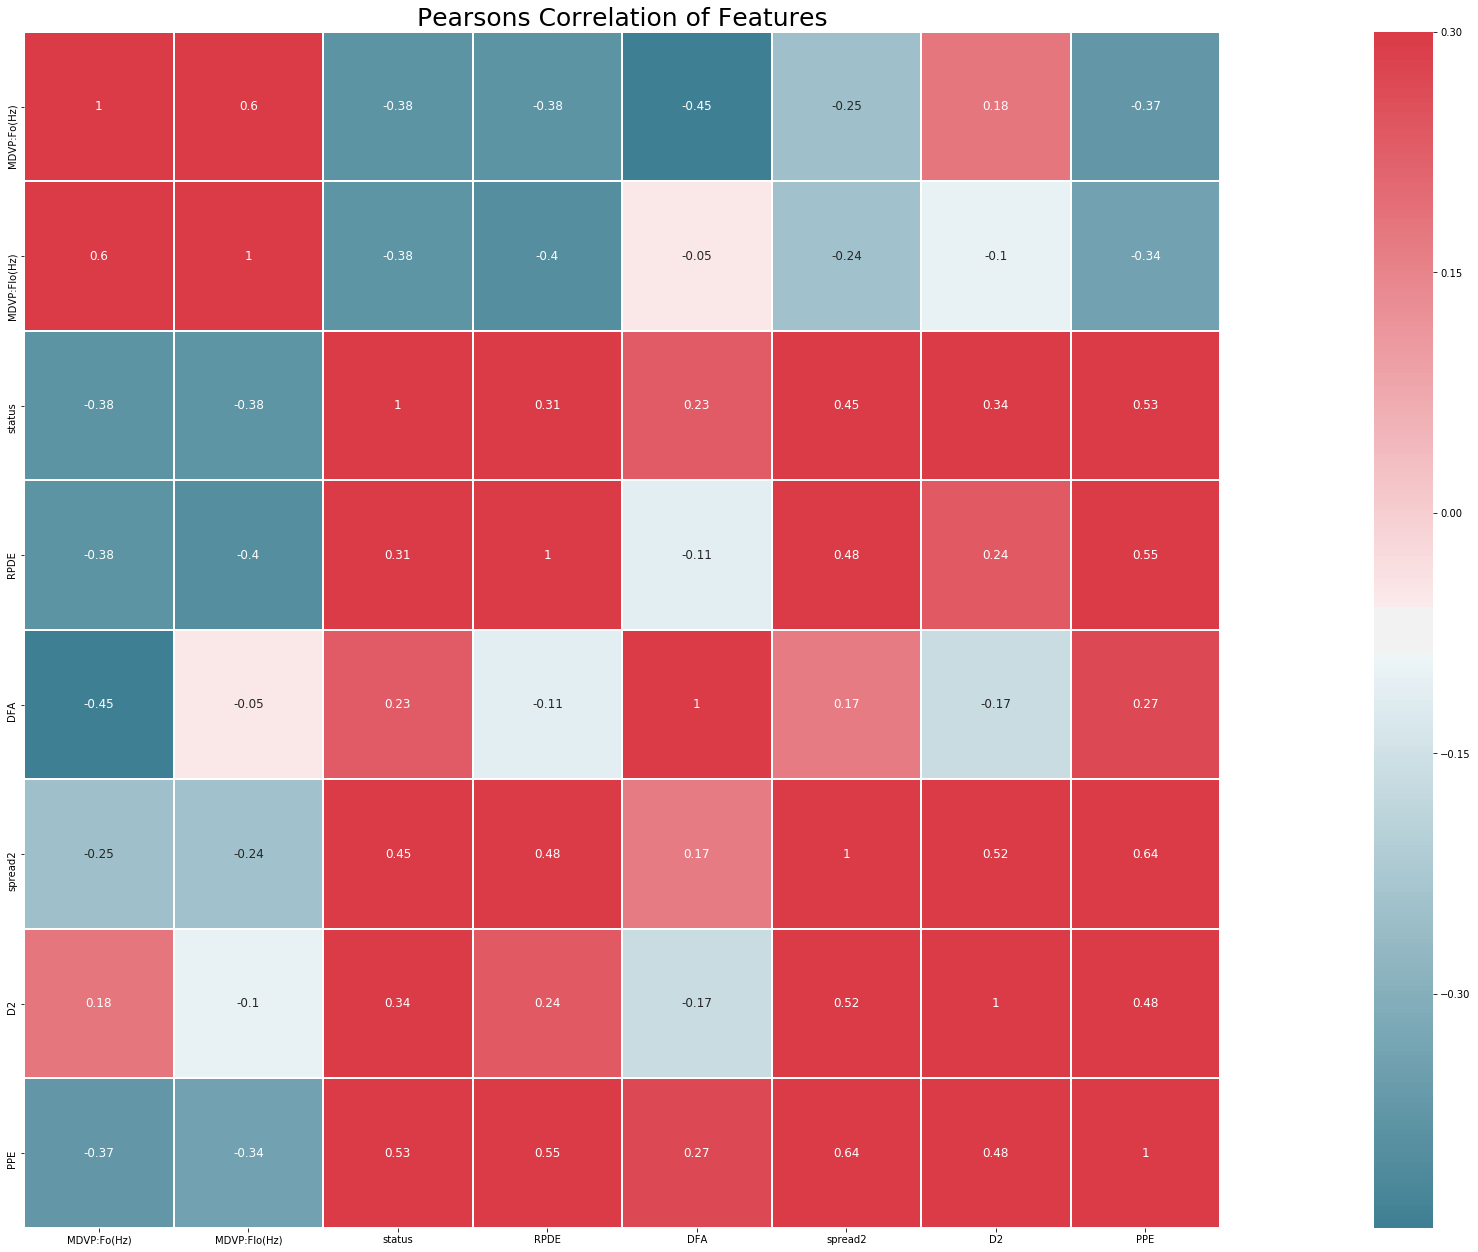

In [16]:
    #correlation heatmap after dropping columns from dataset
    corr_train = park_df.corr()
    fig , ax = plt.subplots(figsize =(55,22))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(corr_train,cmap = colormap,square=True,cbar_kws={'shrink':1 }, ax=ax,annot=True,linewidths=1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearsons Correlation of Features', y=1, size=25)

In [17]:
park_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
status,195.0,0.753846,0.431878,0.000000,1.000000,1.000000,1.000000,1.000000
RPDE,195.0,0.498536,0.103942,0.256570,0.421306,0.495954,0.587562,0.685151
DFA,195.0,0.718099,0.055336,0.574282,0.674758,0.722254,0.761881,0.825288
spread2,195.0,0.226510,0.083406,0.006274,0.174351,0.218885,0.279234,0.450493
D2,195.0,2.381826,0.382799,1.423287,2.099125,2.361532,2.636456,3.671155
PPE,195.0,0.206552,0.090119,0.044539,0.137451,0.194052,0.252980,0.527367


C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


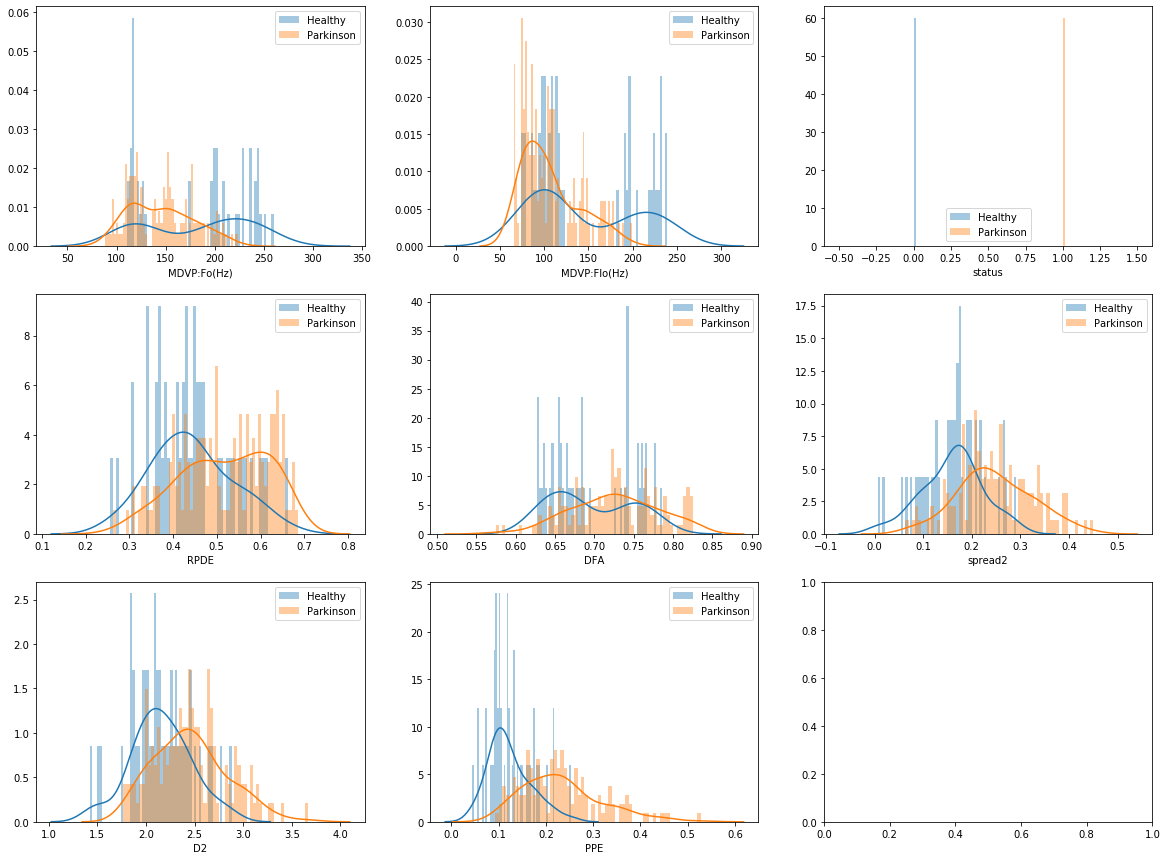

In [18]:
## status - Healthy (one) - Parkinson's (zero)
row = int(np.ceil(len(park_df.select_dtypes(exclude=['object']).columns)/3))
fig, qaxis = plt.subplots(row,3,figsize=(20,15))
col_d = park_df.select_dtypes(exclude=['object']).columns
i=0
j=0
k=0
for i in range (len(col_d)):
  
  ax= sns.distplot(park_df[(park_df['status']==0)==True][col_d[i]],bins=60,ax = qaxis[j,k],label = ['Healthy'])
  ax= sns.distplot(park_df[(park_df['status']==1)==True][col_d[i]],bins=60,ax = qaxis[j,k],label = ['Parkinson'])
  ax.legend()
  k=k+1
  j=j
  if k==3:
    j=j+1
    k=0   

Q4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

Q5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from datetime import datetime
import time


from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [20]:
from sklearn import model_selection

In [21]:
X = np.array(park_df.drop(columns=['status','name'],axis=1)) 
y = np.array(park_df['status'])    

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state = 0)


In [23]:
num_instances = len(X)
num_folds = 10
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))


# evaluate each algorithm / model
results = []
names = []
print("Scores for each algorithm:")
for name, model in models:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    model.fit(X, y)
    predictions = model.predict(X_test)
    print(name, accuracy_score(Y_test, predictions)*100)
    print(matthews_corrcoef(Y_test, predictions))
    

Scores for each algorithm:
LR 91.52542372881356
0.7450186510060725
KNN 91.52542372881356
0.7473079209900036
DT 100.0
1.0


C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-package

In [24]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Q5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

Q6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [25]:
 MLA =  [                                
          ensemble.RandomForestClassifier(criterion='entropy'), 
          tree.DecisionTreeClassifier(criterion='entropy')
          ]

In [26]:
MLA_columns = ['MLA_Name']
MLA_compare = pd.DataFrame(columns = MLA_columns)



In [27]:
MLA_pred = pd.DataFrame({"Actual_Data_Target":Y_test})  
MLA_pred.head()

,Actual_Data_Target
0,1
1,1
2,0
3,1
4,0


In [28]:
row_index = 0
for alg in MLA:
    
    from datetime import datetime    
    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA_Name'] = MLA_name
    #MLA_compare.loc[row_index, 'MLA_Parameters'] = str(alg.get_params())   
    d = alg.fit(X_train, Y_train)
    MLA_pred[MLA_name] = alg.predict(X_test)
    #MLA_compare.loc[row_index, 'MLA_Intercept'] =  alg.intercept_
    MLA_compare.loc[row_index, 'Actual_Y_Shape'] =Y_test.shape
    MLA_compare.loc[row_index, 'confusion_matrix'] = str(metrics.confusion_matrix(Y_test,alg.predict(X_test)))
    MLA_compare.loc[row_index, 'accuracy_score'] = metrics.accuracy_score(Y_test,alg.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test,alg.predict(X_test))
    MLA_compare.loc[row_index, 'True_Positive_Rate\n[Sensitivity/Recall]'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
    MLA_compare.loc[row_index, 'Precision'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
    MLA_compare.loc[row_index, 'True_Negatve_Rate\n[Specificity]'] = confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])    
    MLA_compare.loc[row_index, 'mean_absolute_error'] = metrics.mean_absolute_error(Y_test, alg.predict(X_test))
    MLA_compare.loc[row_index, 'mean_squared_error'] = metrics.mean_squared_error(Y_test, alg.predict(X_test))
    MLA_compare.loc[row_index, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(Y_test, alg.predict(X_test)))
    #MLA_compare.loc[row_index, 'explained_variance_score'] = explained_variance_score(Y_test, alg.predict(X_test))
    MLA_compare.loc[row_index, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    row_index+=1    
     

C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
MLA_compare.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
MLA_compare.nlargest(5,'accuracy_score')


,MLA_Name,Actual_Y_Shape,confusion_matrix,accuracy_score,True_Positive_Rate [Sensitivity/Recall],Precision,True_Negatve_Rate [Specificity],mean_absolute_error,mean_squared_error,root_mean_squared_error,Timestamp
0,RandomForestClassifier,59.0,[[13 0]\n [ 3 43]],0.949153,0.934783,1.00000,0.934783,0.050847,0.050847,0.225494,2019-09-26 23:17:53
1,DecisionTreeClassifier,59.0,[[12 1]\n [ 5 41]],0.898305,0.891304,0.97619,0.891304,0.101695,0.101695,0.318896,2019-09-26 23:17:53


Q7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

Q8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [30]:
MLA_columns = ['MLA_Name']
MLA_compare1 = pd.DataFrame(columns = MLA_columns)

In [32]:
max_depths1 = np.linspace(1, 32, 32, endpoint=True)
count=0
for max_depth1 in max_depths1:
    MLA1 =  [                                
          ensemble.RandomForestClassifier(criterion='entropy'), 
          tree.DecisionTreeClassifier(criterion='entropy')
          ]
    row_index1 = count  
    for alg in MLA1:
        MLA_name = alg.__class__.__name__
        MLA_compare1.loc[row_index1, 'MLA_Name'] = MLA_name
        d = alg.fit(X_train, Y_train)
        MLA_compare1.loc[row_index1, 'Actual_Y_Shape'] =Y_test.shape
        MLA_compare1.loc[row_index1, 'max_depths'] =max_depth1
        MLA_compare1.loc[row_index1, 'confusion_matrix'] = str(metrics.confusion_matrix(Y_test,alg.predict(X_test)))
        MLA_compare1.loc[row_index1, 'accuracy_score'] = metrics.accuracy_score(Y_test,alg.predict(X_test))
        confusion_matrix = metrics.confusion_matrix(Y_test,alg.predict(X_test))
        MLA_compare1.loc[row_index1, 'True_Positive_Rate\n[Sensitivity/Recall]'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
        MLA_compare1.loc[row_index1, 'Precision'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
        MLA_compare1.loc[row_index1, 'True_Negatve_Rate\n[Specificity]'] = confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])    
        MLA_compare1.loc[row_index1, 'mean_absolute_error'] = metrics.mean_absolute_error(Y_test, alg.predict(X_test))
        MLA_compare1.loc[row_index1, 'mean_squared_error'] = metrics.mean_squared_error(Y_test, alg.predict(X_test))
        MLA_compare1.loc[row_index1, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(Y_test, alg.predict(X_test)))
        MLA_compare1.loc[row_index1, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
        row_index1+=1
        count=row_index1

C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

In [33]:
MLA_compare1.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
MLA_compare1.nlargest(5,'accuracy_score')

,MLA_Name,Actual_Y_Shape,max_depths,confusion_matrix,accuracy_score,True_Positive_Rate [Sensitivity/Recall],Precision,True_Negatve_Rate [Specificity],mean_absolute_error,mean_squared_error,root_mean_squared_error,Timestamp
6,RandomForestClassifier,59.0,4.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.0,0.978261,0.016949,0.016949,0.130189,2019-09-26 23:19:40
30,RandomForestClassifier,59.0,16.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.0,0.978261,0.016949,0.016949,0.130189,2019-09-26 23:19:40
34,RandomForestClassifier,59.0,18.0,[[13 0]\n [ 1 45]],0.983051,0.978261,1.0,0.978261,0.016949,0.016949,0.130189,2019-09-26 23:19:40
10,RandomForestClassifier,59.0,6.0,[[13 0]\n [ 2 44]],0.966102,0.956522,1.0,0.956522,0.033898,0.033898,0.184115,2019-09-26 23:19:40
22,RandomForestClassifier,59.0,12.0,[[13 0]\n [ 2 44]],0.966102,0.956522,1.0,0.956522,0.033898,0.033898,0.184115,2019-09-26 23:19:40


In [37]:
DEPTH_MAX= MLA_compare1.nlargest(1,'accuracy_score')
DEPTH_MAX_VALUE = np.array(DEPTH_MAX.loc[DEPTH_MAX.index,'max_depths'])
DEPTH_MAX_VALUE[0]


4.0